## .plot() Method

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bb = data.DataReader(name='F', data_source='iex'
                        , start='2017-07-01', end='2018-05-01')

1y


In [5]:
bb.head()

,open,high,low,close,volume
date,,,,,
2017-07-03,10.6706,10.9758,10.5672,10.8584,43949588
2017-07-05,10.8114,10.8584,10.5766,10.6142,39412233
2017-07-06,10.6048,10.6706,10.4921,10.5015,31935984
2017-07-07,10.5297,10.5954,10.4827,10.5766,20871848
2017-07-10,10.5578,10.6612,10.5484,10.6518,18881282


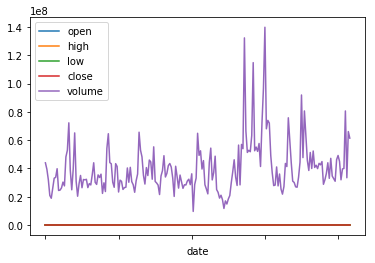

In [6]:
#  直接使用plot，我們可以看到集成了matplotlib，直接產生了股價圖
#  索引的部份直接當了x軸，並且自動幫我們把五個價格分成五條趨勢線
#  但是我們也發現到，只有volume的趨勢是看的出來的，其餘都在底部
#  這是因為volume的值太大了
bb.plot()

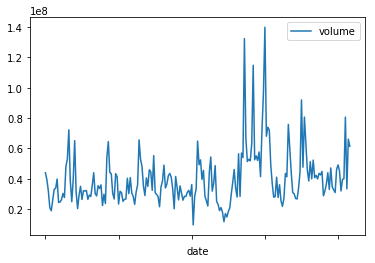

In [10]:
#  透過參數y來指定需求column
bb.plot(y='volume')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


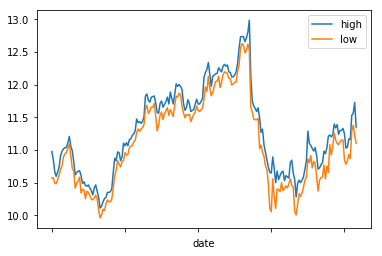

In [11]:
bb.plot(y=['high','low'])

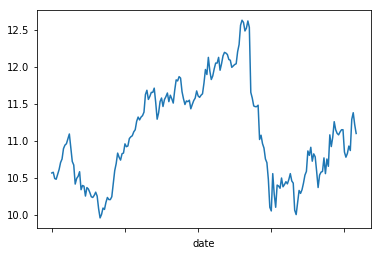

In [12]:
#  另外來看，可以單純show出某欄位之後直接plot
bb['low'].plot()

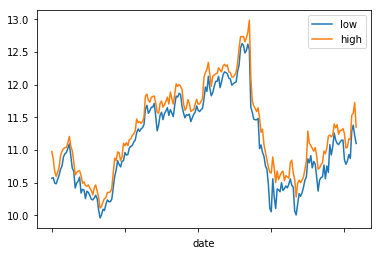

In [15]:
bb[['low','high']].plot()

## Modifying Aesthetics

In [ ]:
bb = data.DataReader(name='F', data_source='iex'
                        , start='2017-07-01', end='2018-05-01')
bb.head()

In [16]:
#  matplotlib可用風格
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

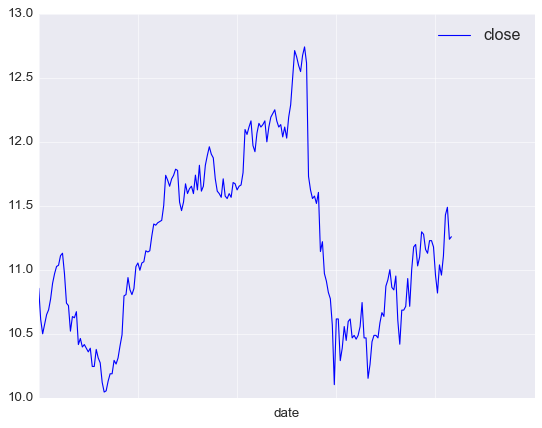

In [20]:
#  透過plt.style.use直接套用風格檔
plt.style.use('seaborn-darkgrid')
bb.plot(y='close')

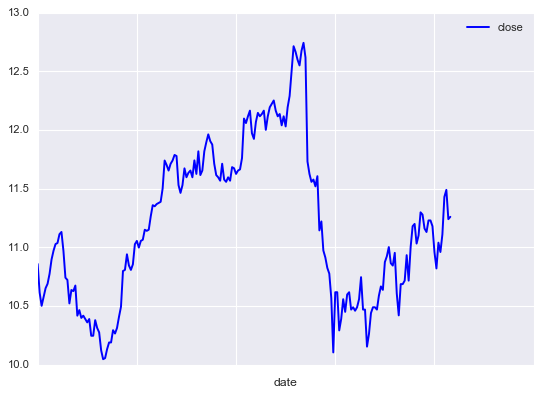

In [21]:
plt.style.use('seaborn-notebook')
bb.plot(y='close')

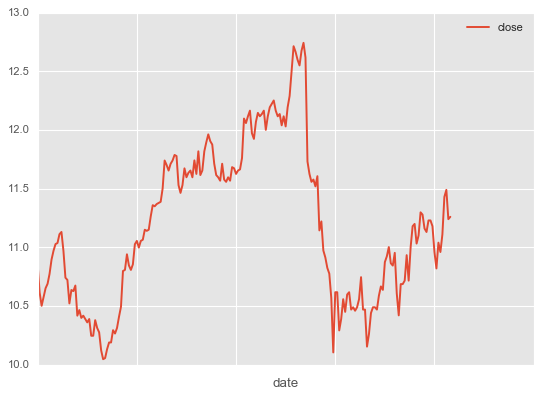

In [22]:
plt.style.use('ggplot')
bb.plot(y='close')

## Bar charts

In [28]:
def rank_performance(stock_price):
    if stock_price > 12:
        return 'Good'
    else:
        return 'NoBad'

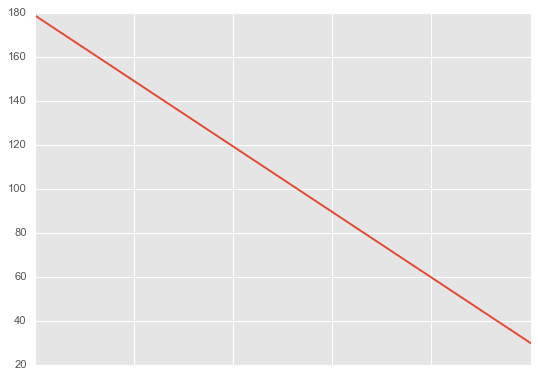

In [32]:
#  利用上面定義的函式來取得回傳值
#  如果直接plot是不會有感覺的，因為預設plot的類型為line
bb['close'].apply(rank_performance).value_counts().plot()

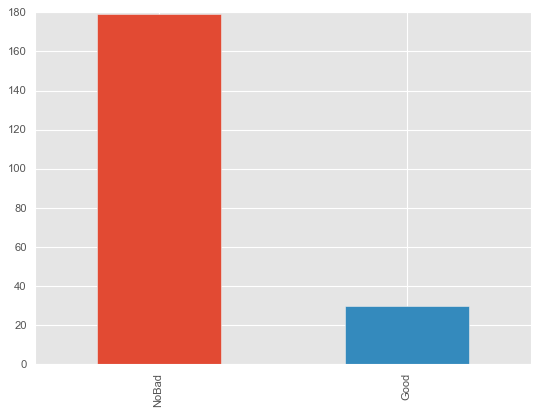

In [34]:
#  利用參數kind來變換圖形模式
plt.style.use('ggplot')
bb['close'].apply(rank_performance).value_counts().plot(kind='bar')

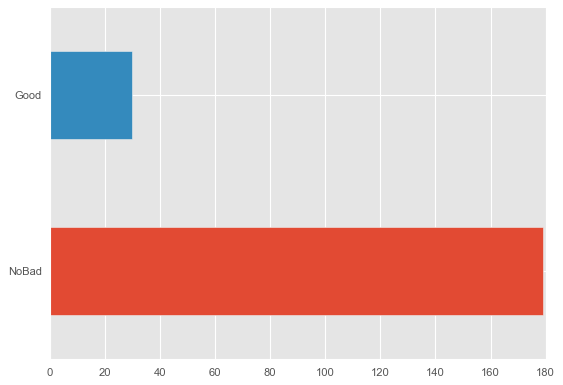

In [35]:
#  利用參數kind來變換圖形模式
#  barh就是橫軸
plt.style.use('ggplot')
bb['close'].apply(rank_performance).value_counts().plot(kind='barh')

#  Pie Charts

In [36]:
bb['close'].mean()

11.18766746411483

In [37]:
def rank_performance(stock_price):
    if stock_price > 11.18766746411483:
        return 'Above'
    else:
        return 'Below'

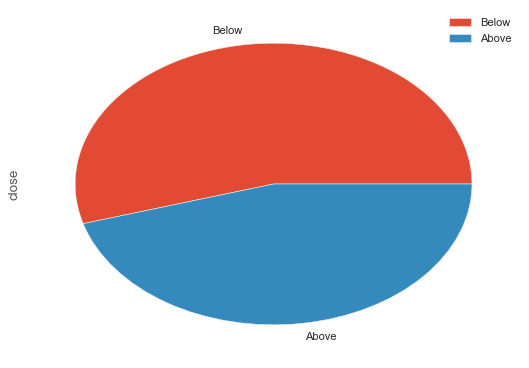

In [43]:
#  計算股價高於均值的次數
#  利用legend來控制label
plt.style.use('ggplot')
bb['close'].apply(rank_performance).value_counts().plot(kind='pie', legend=True)

## Histograms

In [52]:
google = data.DataReader(name='GOOG', data_source='iex'
                        , start='2016-01-01', end='2018-05-01')
google.head()

5y


,open,high,low,close,volume
date,,,,,
2016-01-04,743.00,744.06,731.2577,741.84,3272776
2016-01-05,746.45,752.00,738.6400,742.58,1950691
2016-01-06,730.00,747.18,728.9200,743.62,1947034
2016-01-07,730.31,738.50,719.0600,726.39,2963741
2016-01-08,731.45,733.23,713.0000,714.47,2450857


In [60]:
#  如果/100 然後剩乘100，就可以看股價在100、200、300、的次數
def custome_roune(stock_price):
    return int(stock_price/100.0) * 100

In [63]:
#  計算google股價在各百元區間的次數
google['high'].apply(custome_roune).value_counts().sort_index()

600      15
700     228
800      89
900     127
1000     85
1100     42
Name: high, dtype: int64

In [66]:
google['high'].apply(custome_roune).nunique()

6

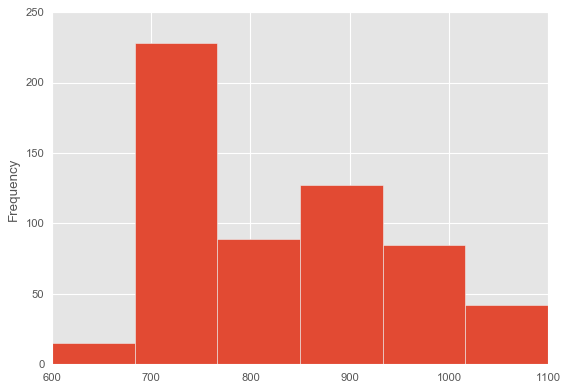

In [68]:
#  利用bins來設置偏移
google['high'].apply(custome_roune).plot(kind='hist', bins=6)